In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('./housing.csv')

In [4]:
ocean_proximity_dict={
    '<1H OCEAN':1,
    'INLAND':2,
    'NEAR OCEAN':3,
    'NEAR BAY':4,
    'ISLAND':5
}
df['ocean_proximity']=df['ocean_proximity'].map(lambda place: ocean_proximity_dict[place])

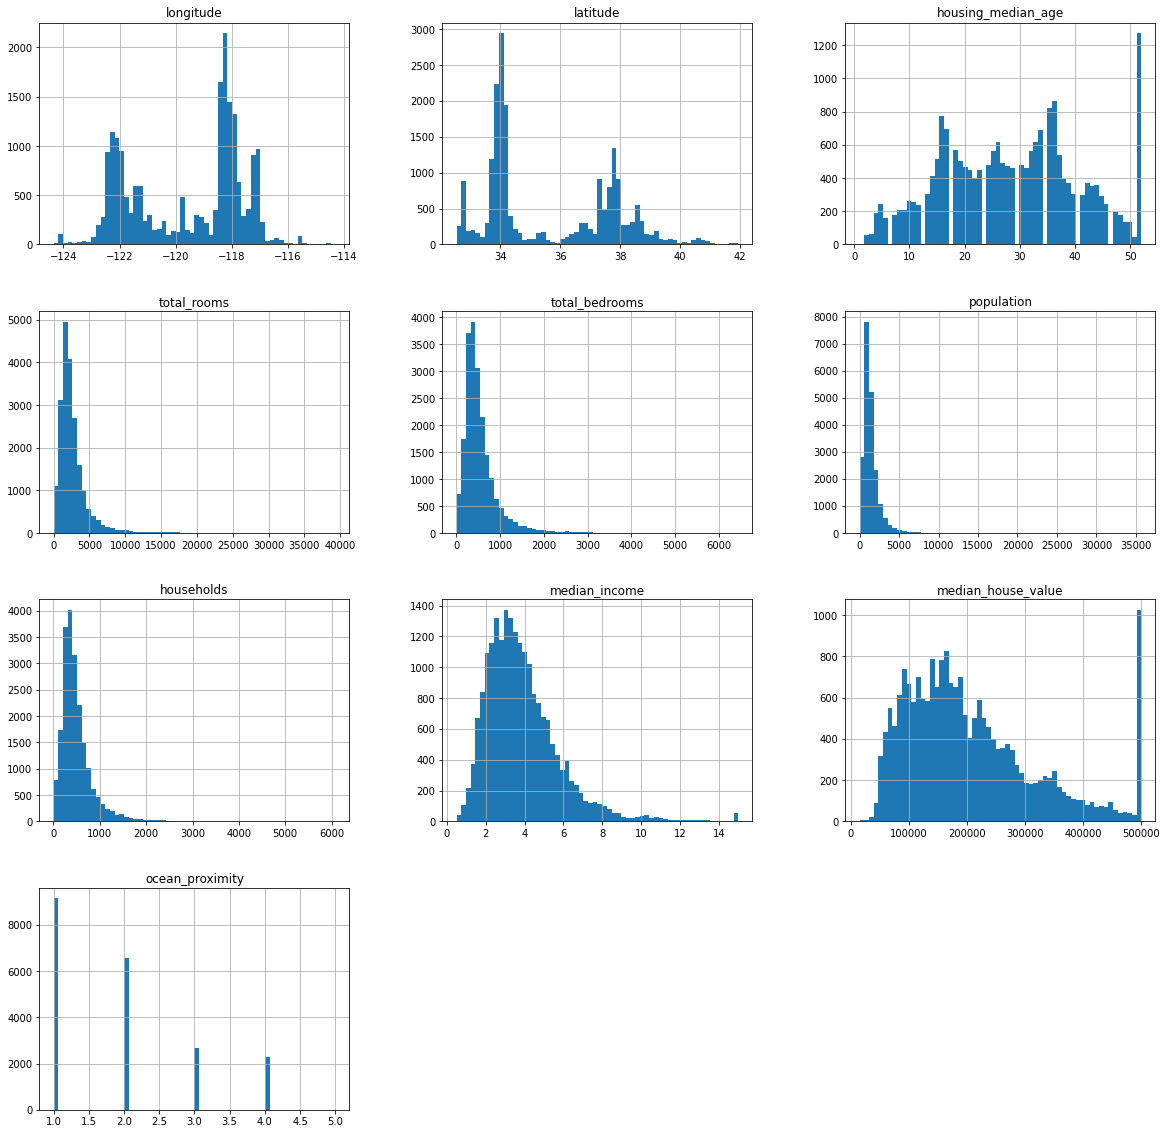

In [5]:
df.hist(figsize=(20,20),bins=60)
plt.show()

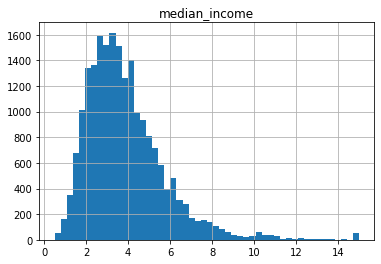

In [6]:
df.hist('median_income',bins=50)
plt.show()

In [7]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6293,-117.89,34.01,23.0,4535.0,955.0,3881.0,930.0,3.6275,154100.0,1
1404,-122.07,37.96,37.0,1217.0,199.0,552.0,194.0,5.0445,196200.0,4
7924,-118.08,33.84,31.0,2377.0,600.0,2042.0,593.0,3.6250,170400.0,1
7834,-118.16,33.91,35.0,1403.0,338.0,1415.0,367.0,3.0967,144000.0,1
3703,-118.37,34.18,33.0,1829.0,512.0,1345.0,500.0,3.1629,198900.0,1
14107,-117.11,32.75,46.0,695.0,182.0,601.0,195.0,2.4219,90600.0,3
10212,-117.90,33.88,35.0,2062.0,353.0,991.0,357.0,5.2897,230400.0,1
6480,-118.04,34.09,32.0,1339.0,334.0,817.0,349.0,2.8333,186000.0,2
12365,-116.47,33.81,7.0,10105.0,2481.0,6274.0,2095.0,2.4497,90900.0,2
8577,-118.41,33.89,31.0,1428.0,320.0,677.0,331.0,7.2316,500001.0,1


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.908769
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.004549
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
df["income_cat"] = np.ceil(df["median_income"] / 1.5)

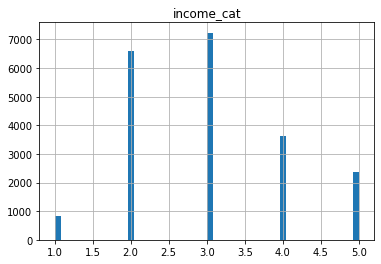

In [21]:

df["income_cat"].where(df["income_cat"] < 5, 5.0, inplace=True)

df.hist('income_cat',bins=50)
plt.show()

# data exploration

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

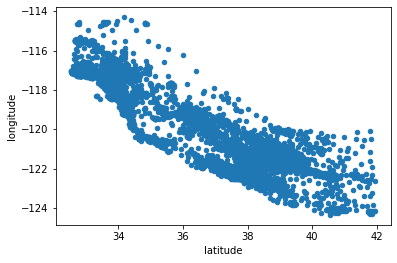

In [13]:
df.plot.scatter(x='latitude',y='longitude')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

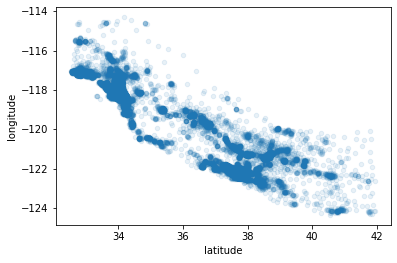

In [14]:
df.plot.scatter(x='latitude',y='longitude',alpha=.1)

No handles with labels found to put in legend.


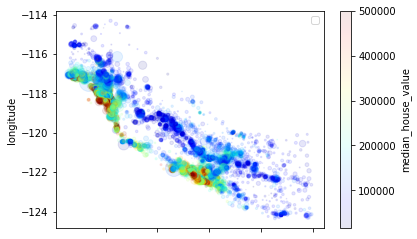

In [15]:
df.plot(kind='scatter',x='latitude',y='longitude',alpha=.1,s=df['population']/100,c='median_house_value',cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [16]:
corr=df.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.439870,-0.011272
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.390957,-0.079676
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.145163,-0.116386
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.016309,0.192523
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.021466,-0.006902
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.083537,0.004307
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.027144,0.012956
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.039673,0.975347
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.021732,0.668189
ocean_proximity,-0.439870,0.390957,0.145163,-0.016309,-0.021466,-0.083537,-0.027144,-0.039673,0.021732,1.000000,-0.042627


In [17]:
median_house_price_corr=corr['median_house_value']
median_house_price_corr.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.668189
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

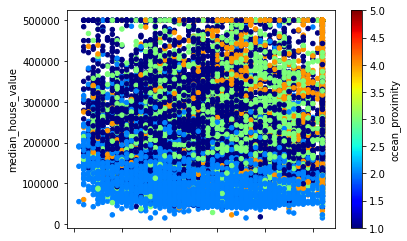

In [18]:
df.plot.scatter(x='housing_median_age',y='median_house_value',c='ocean_proximity',cmap=plt.get_cmap("jet"))

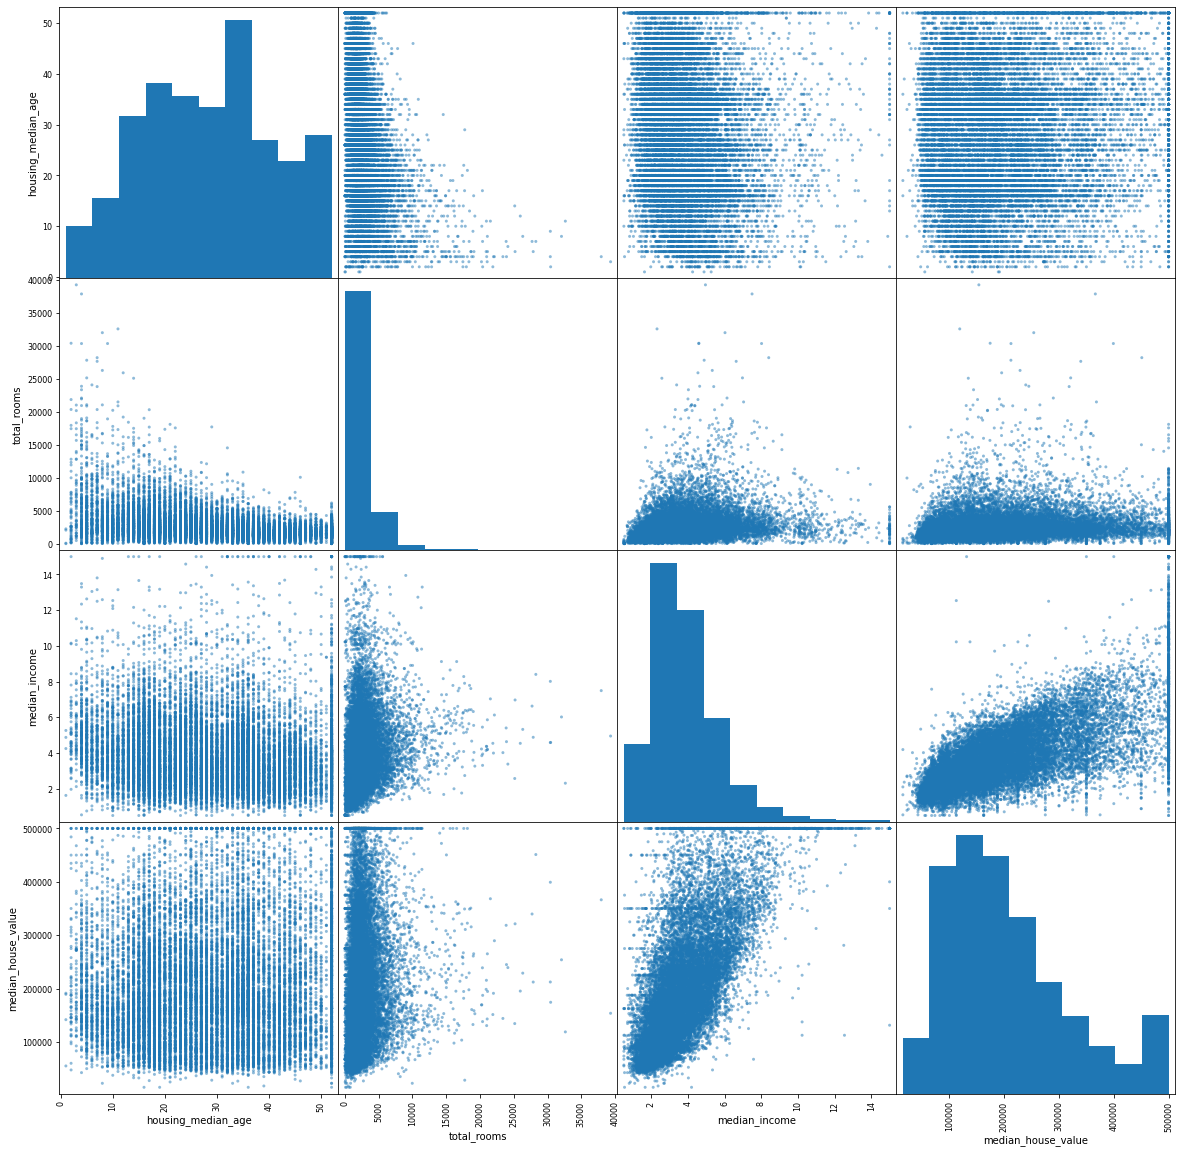

In [19]:
from pandas.plotting import scatter_matrix
 
scatter_matrix(df[[ 'housing_median_age', 'total_rooms', 'median_income','median_house_value']],alpha=.5,figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

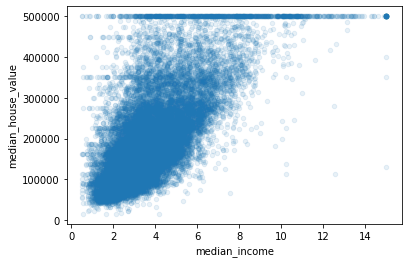

In [20]:
df.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [ ]:
df['']